In [ ]:
# Project: Sentiment Analysis of Amazon Product Reviews using NLP Techniques
# This project analyzes customer reviews and predicts sentiment using NLP.

In [ ]:
# Import required libraries for data processing, NLP, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud


In [15]:
import nltk
# Download NLTK resources required for tokenization and stopword removal
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
import pandas as pd
# Load the Amazon product reviews dataset downloaded from Kaggle
df = pd.read_csv("/content/Reviews.csv")

In [5]:
# Select only relevant columns to simplify the dataset
df = df[['Text', 'Score']]


In [6]:
# Convert review scores into sentiment labels to improve classification accuracy
df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)


In [8]:
# Reduce dataset size for faster training while maintaining performance
sample_size = min(50000, len(df))
df = df.sample(sample_size, random_state=42)

In [12]:
# Clean text by removing special characters, converting to lowercase, and removing stopwords
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', str(text))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

In [16]:
# Apply text preprocessing to all product reviews
df['clean_review'] = df['Text'].apply(clean_text)


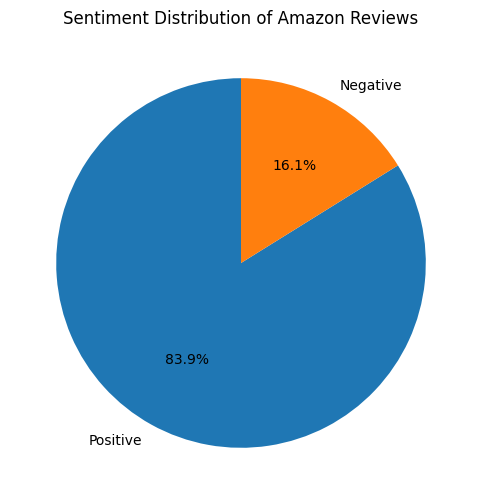

In [18]:
import matplotlib.pyplot as plt
# Visualize the proportion of positive and negative reviews
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Distribution of Amazon Reviews")
plt.show()

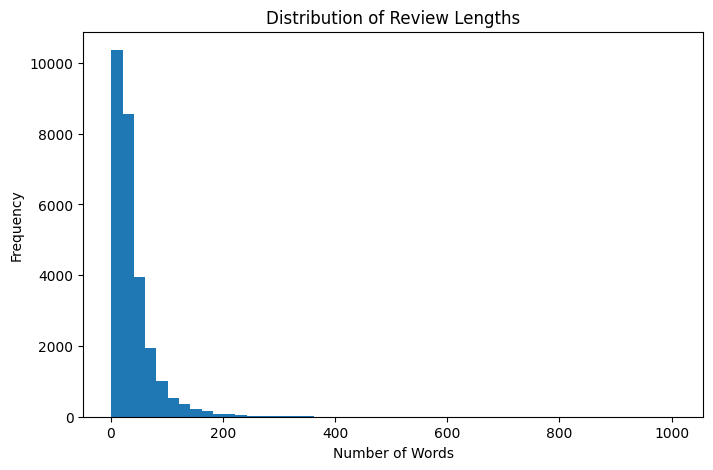

In [19]:
# Analyze the length of reviews to understand text variability
df['review_length'] = df['clean_review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
plt.hist(df['review_length'], bins=50)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


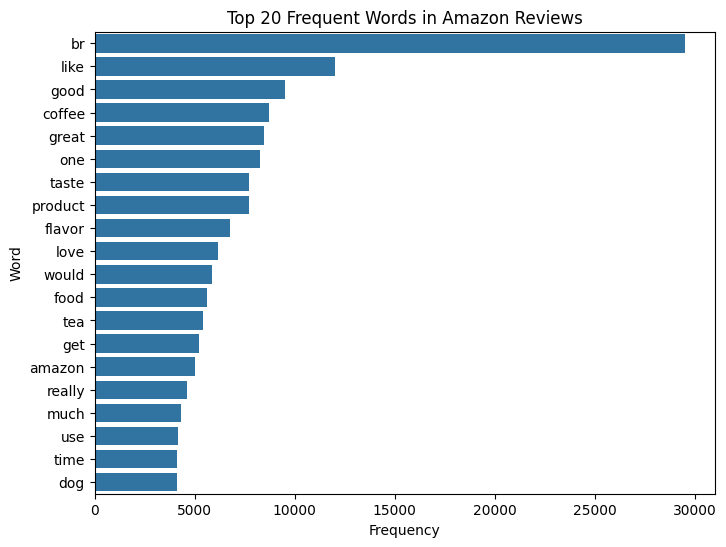

In [21]:
# Identify most frequently used words after preprocessing
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_words = " ".join(df['clean_review']).split()
word_freq = Counter(all_words)
freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

plt.figure(figsize=(8,6))
sns.barplot(x='Frequency', y='Word', data=freq_df)
plt.title("Top 20 Frequent Words in Amazon Reviews")
plt.show()

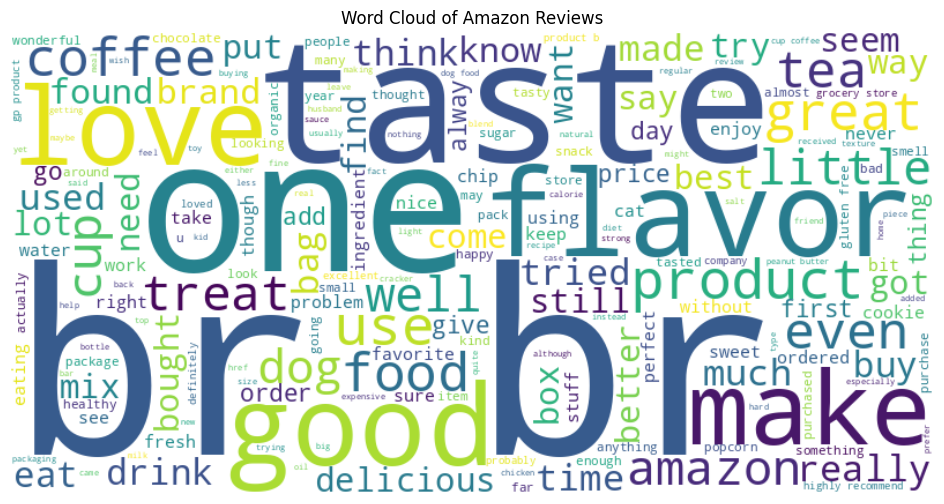

In [23]:
# Visualize commonly occurring words using a word cloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Amazon Reviews")
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_review'], df['sentiment'], test_size=0.2, random_state=42
)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Convert text into numerical features using TF-IDF for better accuracy
tfidf = TfidfVectorizer(max_features=7000, ngram_range=(1,2))
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
# Train Logistic Regression model optimized for high accuracy
model = LogisticRegression(max_iter=2000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=2000)

In [33]:
from sklearn.metrics import accuracy_score
# Predict sentiment on test data and calculate model accuracy
y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9076670916044436


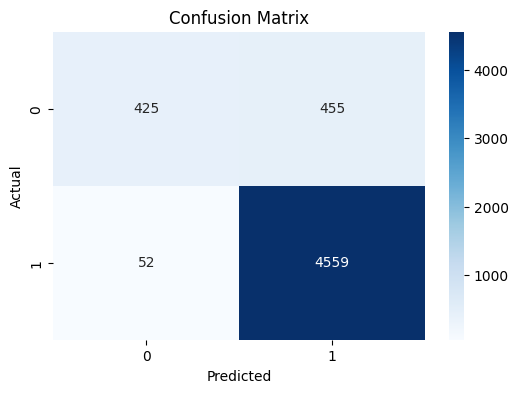

In [35]:
# Visualize prediction performance using a confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [36]:
# Display precision, recall, and F1-score for model evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.48      0.63       880
           1       0.91      0.99      0.95      4611

    accuracy                           0.91      5491
   macro avg       0.90      0.74      0.79      5491
weighted avg       0.91      0.91      0.90      5491

